In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Administrator\\dhaka-bangladesh-real-estate-recommendation\\src\\data\\Merged_Data\\cleaned_merged_datasets.csv")

# Show full columns
pd.set_option('display.max_columns', None)
df.head()

ParserError: Error tokenizing data. C error: Expected 22 fields in line 17294, saw 24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [4]:
df.isna().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [4]:
# Drop missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12589 entries, 2 to 17281
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   12589 non-null  float64
 1   building_type                          12589 non-null  object 
 2   building_nature                        12589 non-null  object 
 3   image_url                              12589 non-null  object 
 4   num_bath_rooms                         12589 non-null  float64
 5   num_bed_rooms                          12589 non-null  float64
 6   price                                  12589 non-null  float64
 7   property_description                   12589 non-null  object 
 8   property_overview                      12589 non-null  object 
 9   property_url                           12589 non-null  object 
 10  purpose                                12589 non-null  object 
 11  city   

In [5]:
# Descriptive statistics
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
area,12589.0,1.915475e+03,2.952113e+03,40.0,1100.0,1383.0,1987.2,9.993600e+04
num_bath_rooms,12589.0,1.083088e+00,1.539055e+00,0.0,0.0,0.0,3.0,1.000000e+01
num_bed_rooms,12589.0,2.407022e+00,2.226748e+00,0.0,2.0,3.0,3.0,9.400000e+01
price,12589.0,7.394465e+06,2.004284e+07,5500.0,150000.0,5000000.0,8500000.0,1.080000e+09
relaxation_amenity_count,12589.0,2.279768e-02,2.422056e-01,0.0,0.0,0.0,0.0,5.000000e+00
security_amenity_count,12589.0,8.833903e-01,7.667636e-01,0.0,0.0,1.0,1.0,2.000000e+00
maintenance_or_cleaning_amenity_count,12589.0,1.521566e+00,9.481051e-01,0.0,1.0,2.0,2.0,3.000000e+00
social_amenity_count,12589.0,1.303519e-01,4.735700e-01,0.0,0.0,0.0,0.0,5.000000e+00
expendable_amenity_count,12589.0,2.302883e+00,1.454863e+00,0.0,1.0,2.0,3.0,6.000000e+00
service_staff_amenity_count,12589.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


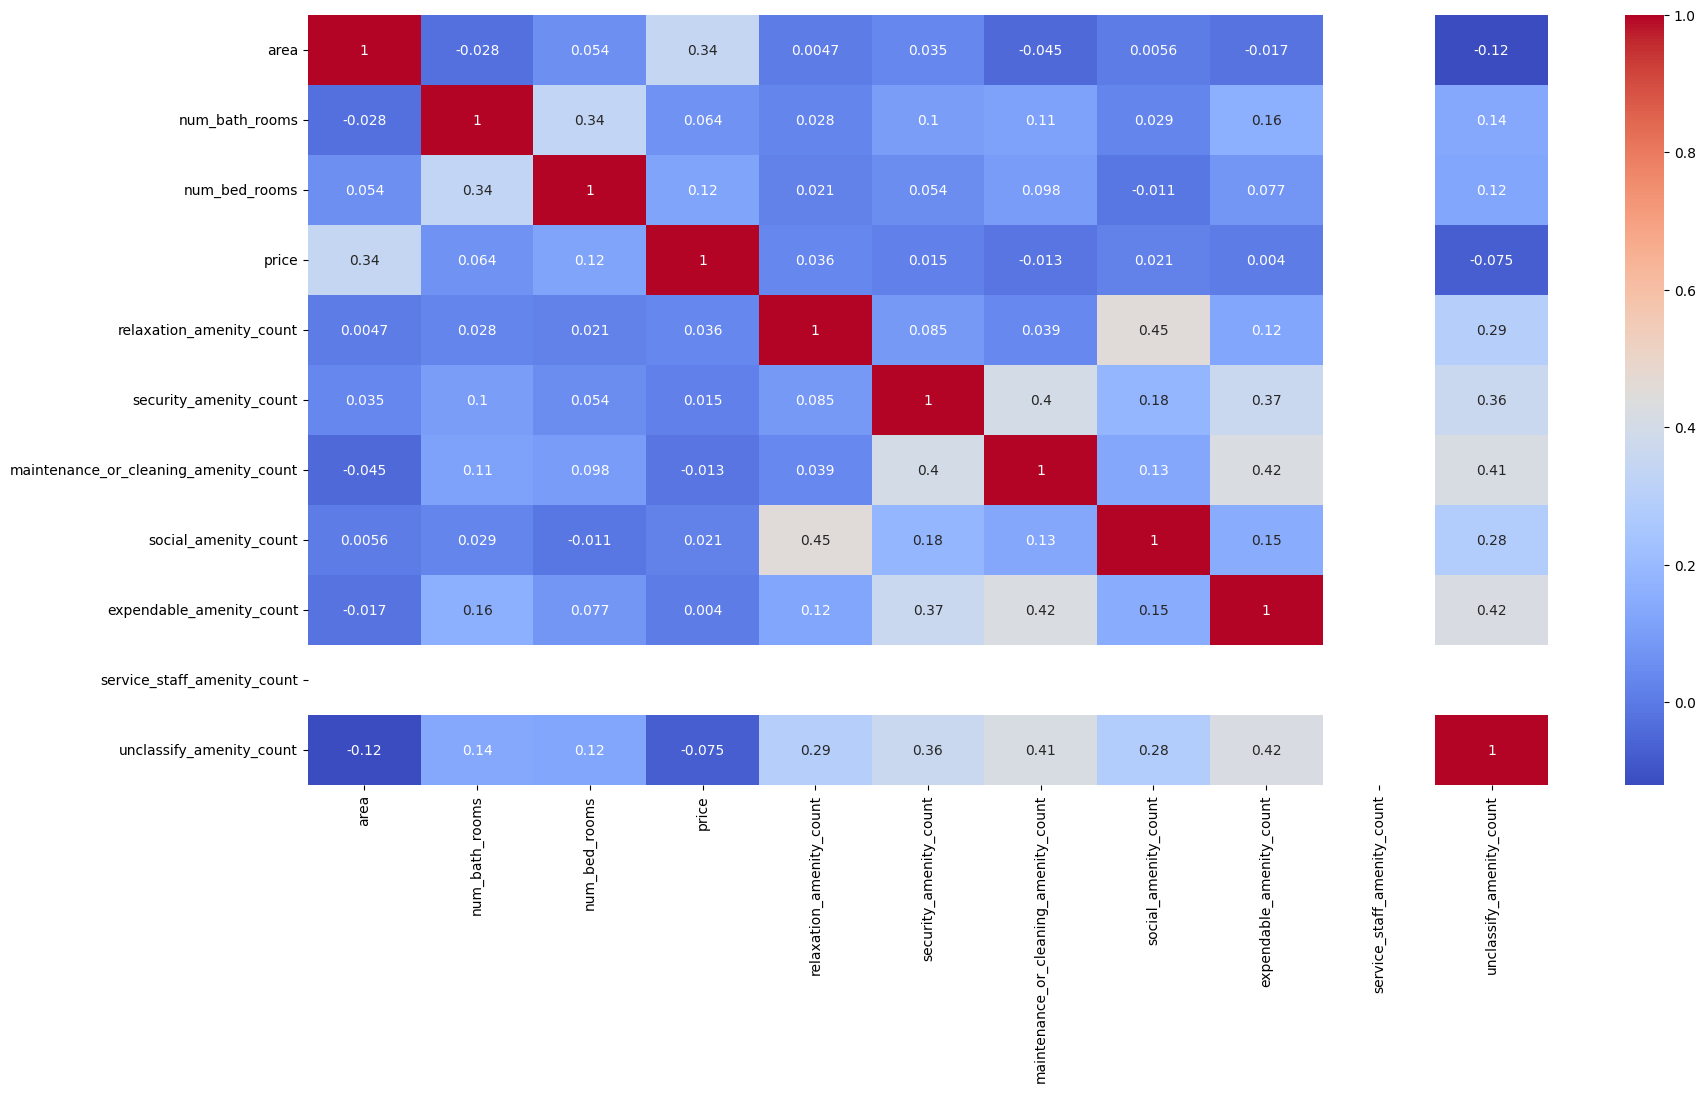

In [6]:
# Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap='coolwarm')
plt.show()

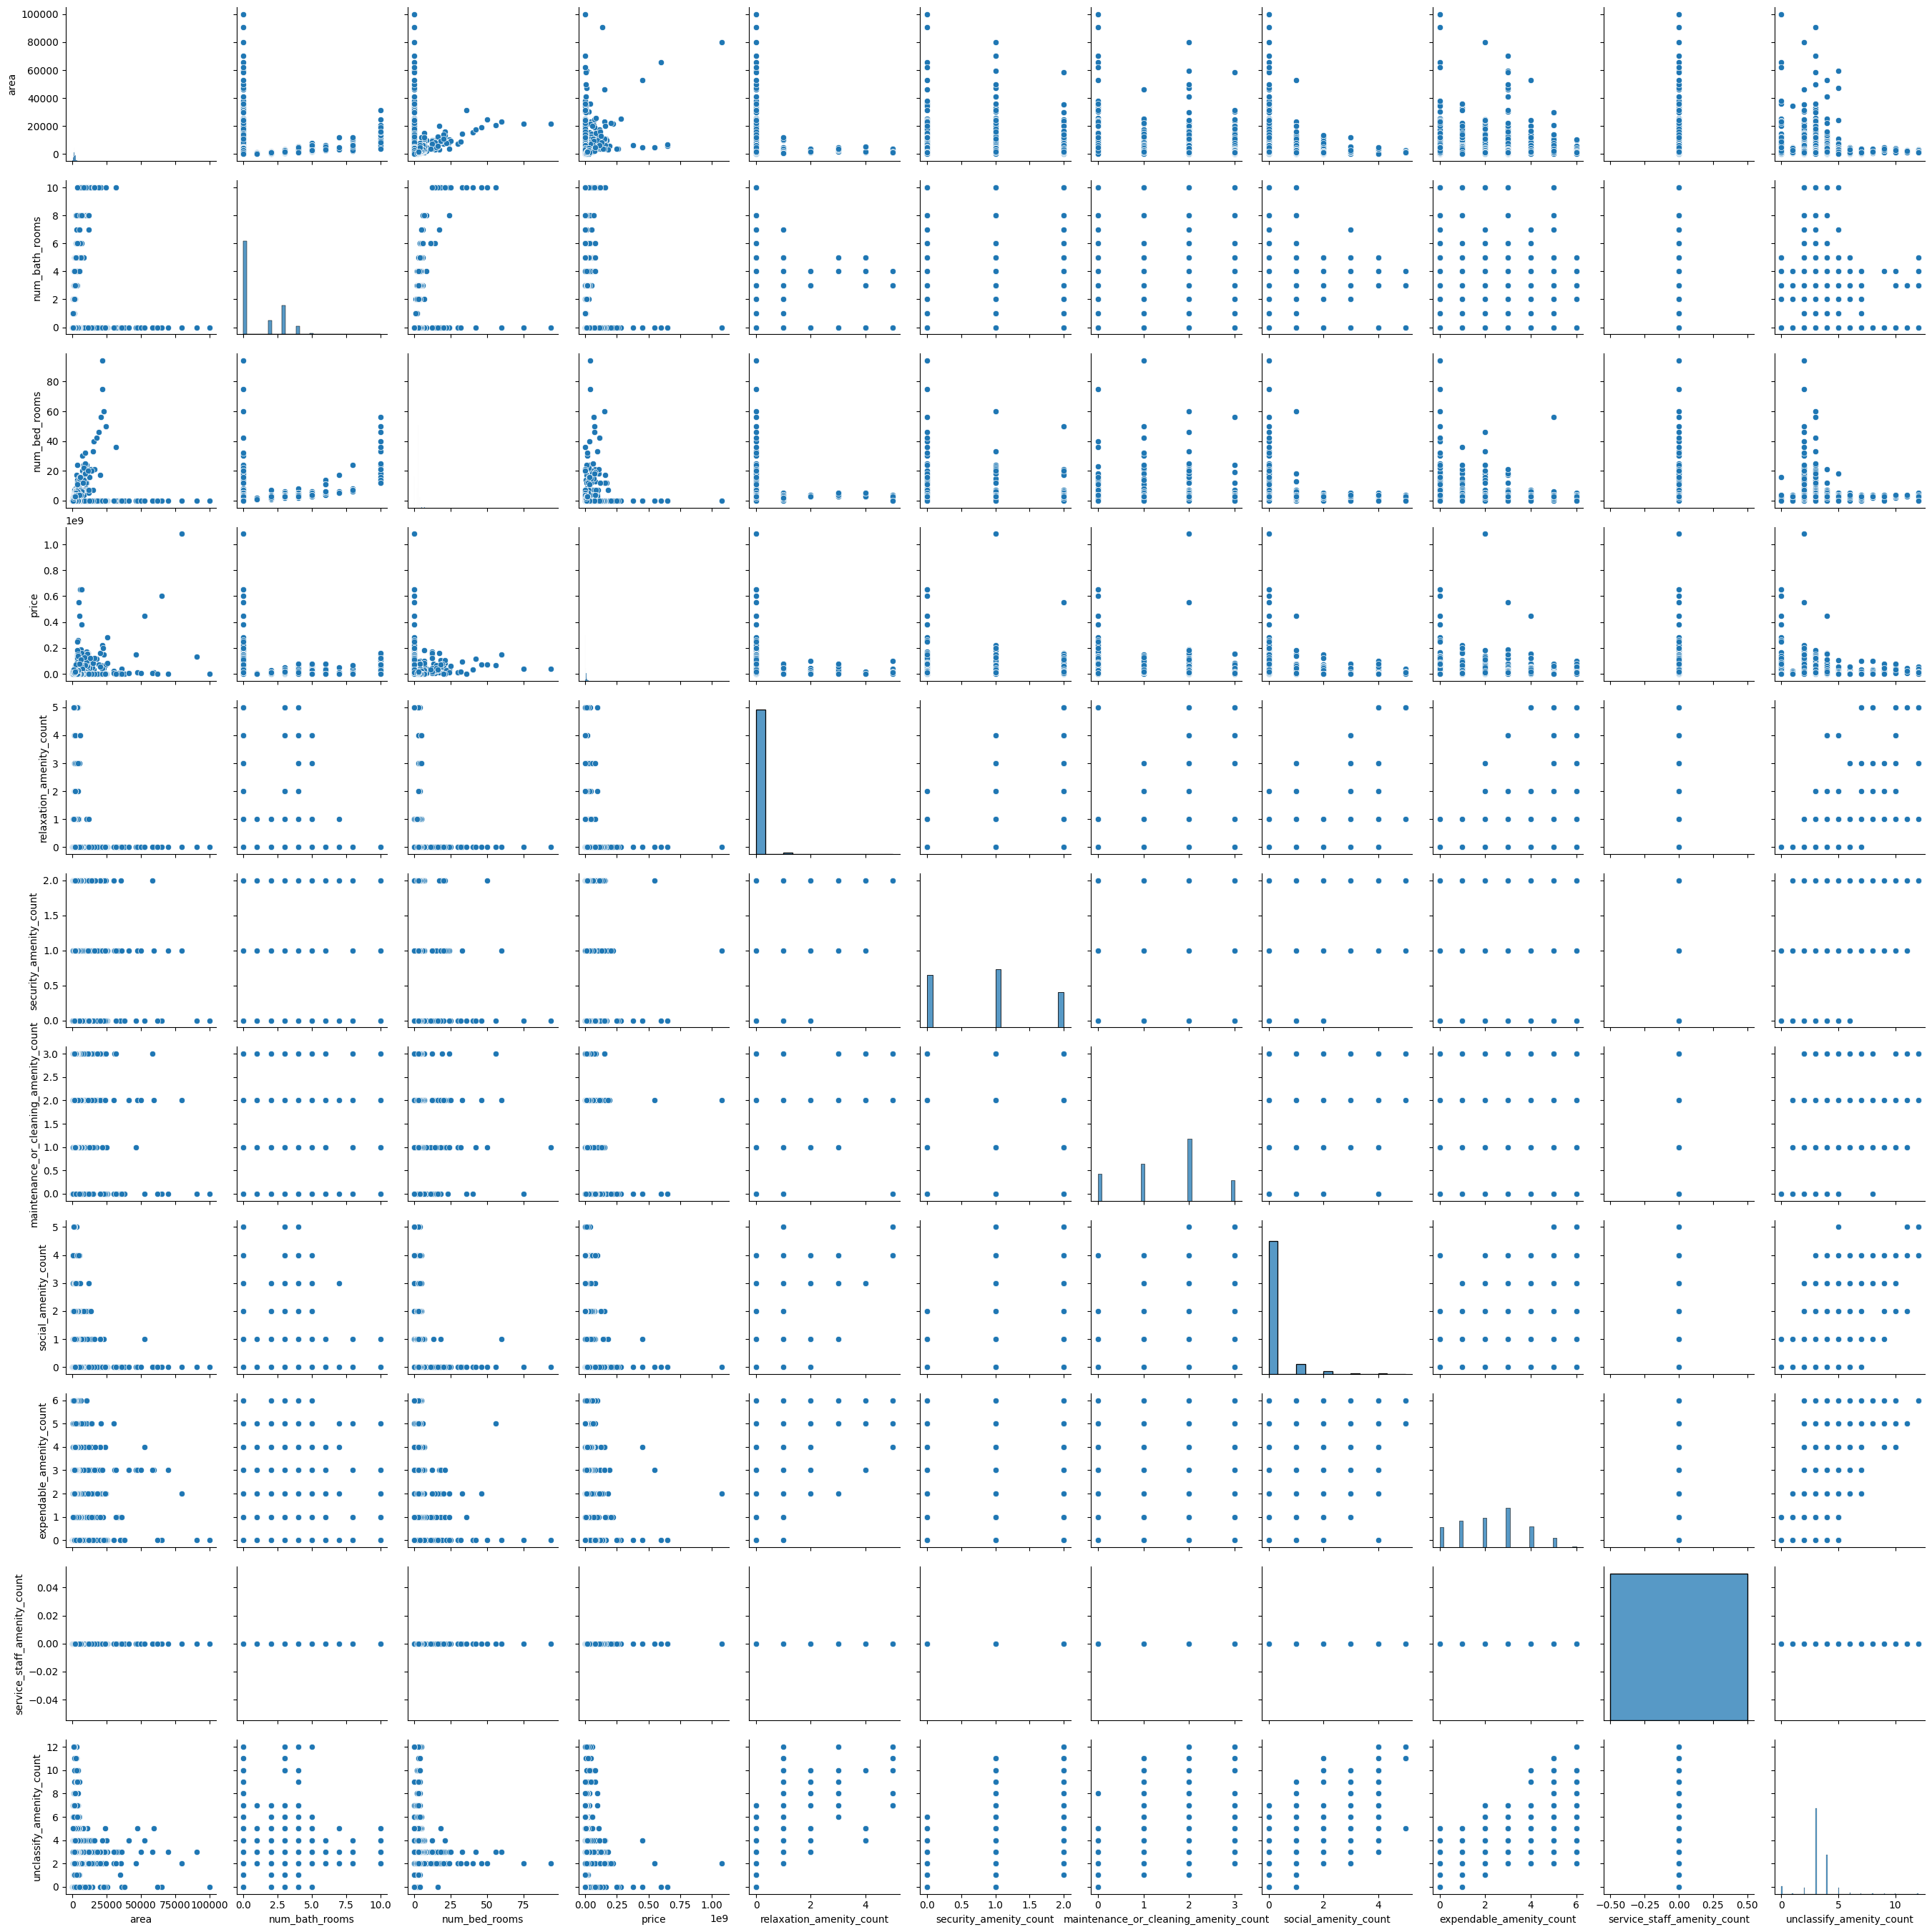

In [9]:
# Pairplot
sns.pairplot(df.select_dtypes(include=["int64", "float64"]))
plt.title("A pairplot of numerical variables");

<Axes: xlabel='price'>

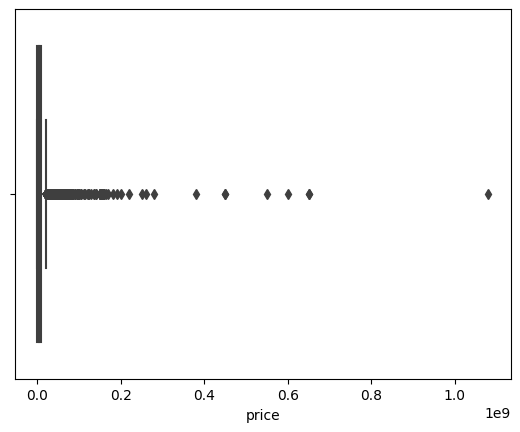

In [12]:
# Visualizations
# Price
sns.boxplot(x='price', data=df)
plt.title("Distribution of target variable");

<Axes: xlabel='area', ylabel='price'>

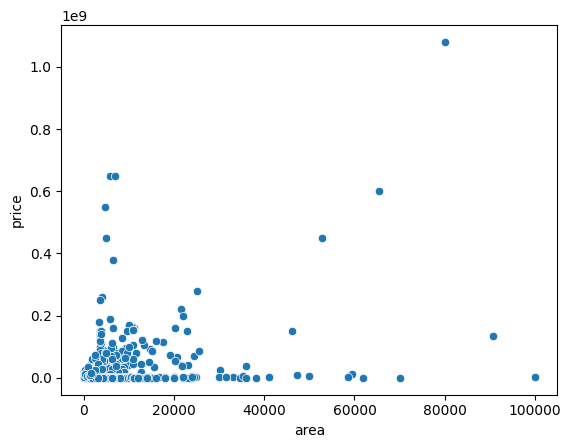

In [13]:
# Price vs. Size
sns.scatterplot(x='area', y='price', data=df)
plt.title("Scatterplot of Price in relation to  floor area")
plt.xlabel("Area")
plt.ylabel("Price");

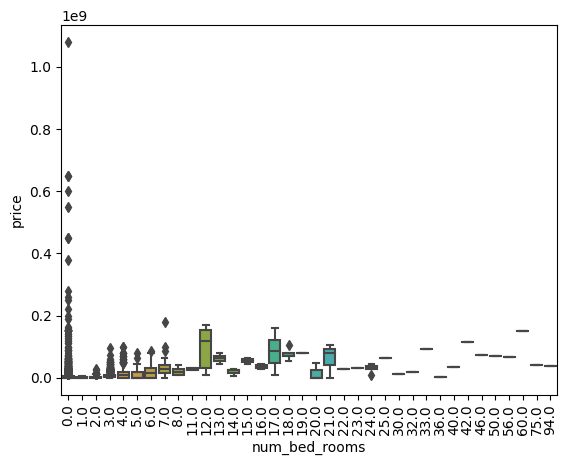

In [16]:
# Price vs. Bedroom
sns.boxplot(x='num_bed_rooms', y='price', data=df)
plt.title("Boxplot showing real estate price in relation to number of bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Price of house")
plt.xticks(rotation=90);

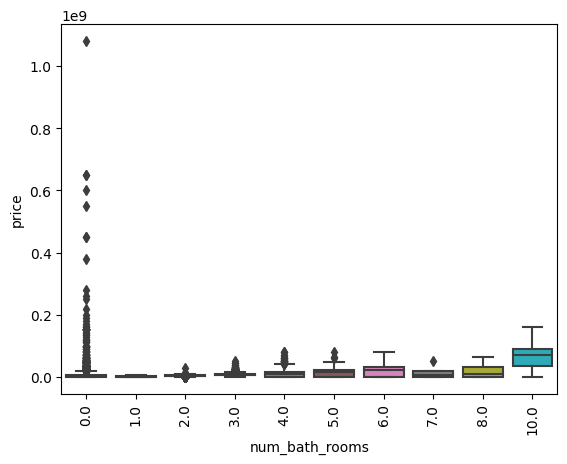

In [17]:
# Price vs. Bathroom
sns.boxplot(x='num_bath_rooms', y='price', data=df)
plt.title("Boxplot depicting relationship between price of real estate and number of bathrooms")
plt.xlabel("Number of bathrooms")
plt.ylabel("Price of house")
plt.xticks(rotation=90);

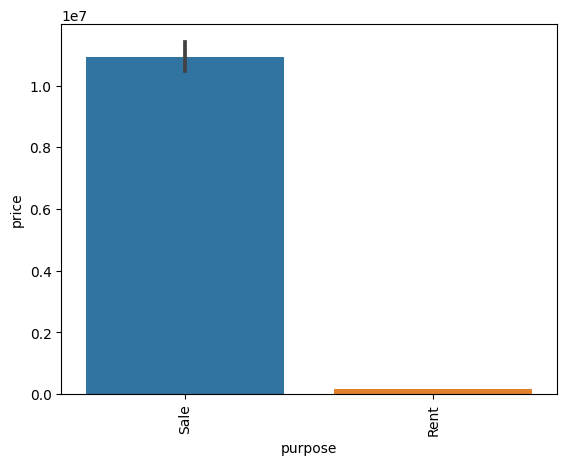

In [8]:
# Barplot for categorical variables
# Price vs. Division
sns.barplot(x='purpose', y='price', data=df)
plt.title("Comparison of the purpose of real estate in relation to price")
plt.xlabel("Purpose of the house")
plt.ylabel("Price of the house")
plt.xticks(rotation=90);

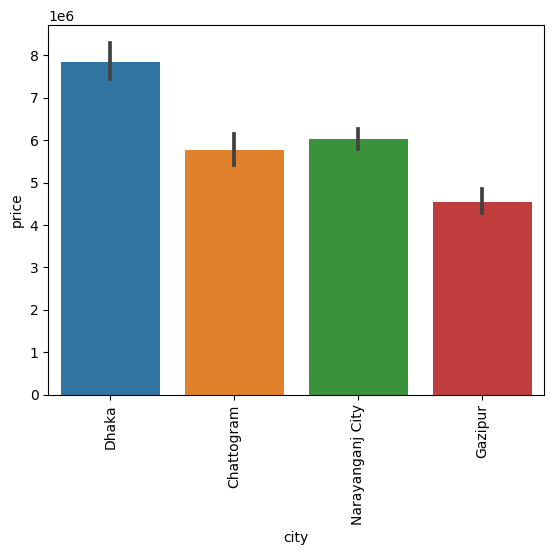

In [9]:
# Price vs city
sns.barplot(x='city', y='price', data=df)
plt.title("Comparison of real estate prices among different cities")
plt.xlabel("City")
plt.ylabel("Price of real estate")
plt.xticks(rotation=90);

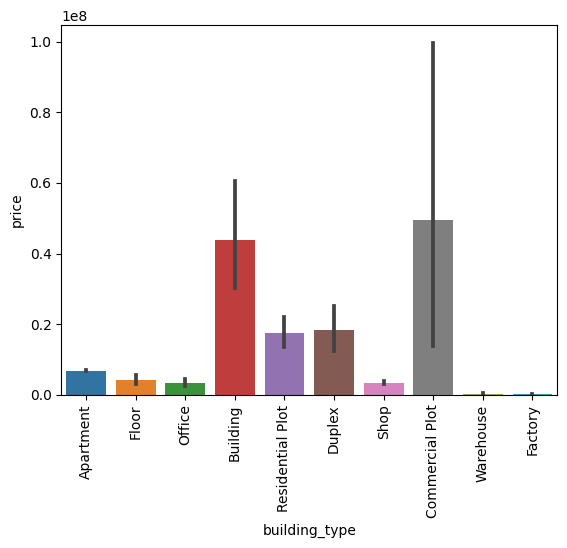

In [10]:
# Price vs building_type
sns.barplot(x='building_type', y='price', data=df)
plt.title("Comparison of various buiding types prices")
plt.xlabel("Building type")
plt.ylabel("Price of the building")
plt.xticks(rotation=90);

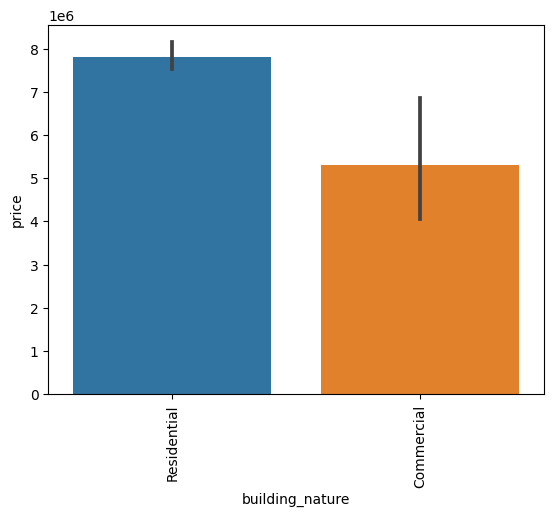

In [11]:
# Price vs building nature
sns.barplot(x='building_nature', y='price', data=df)
plt.title("Comparison of building nature prices")
plt.xlabel("Building nature")
plt.ylabel("Price of building")
plt.xticks(rotation=90);

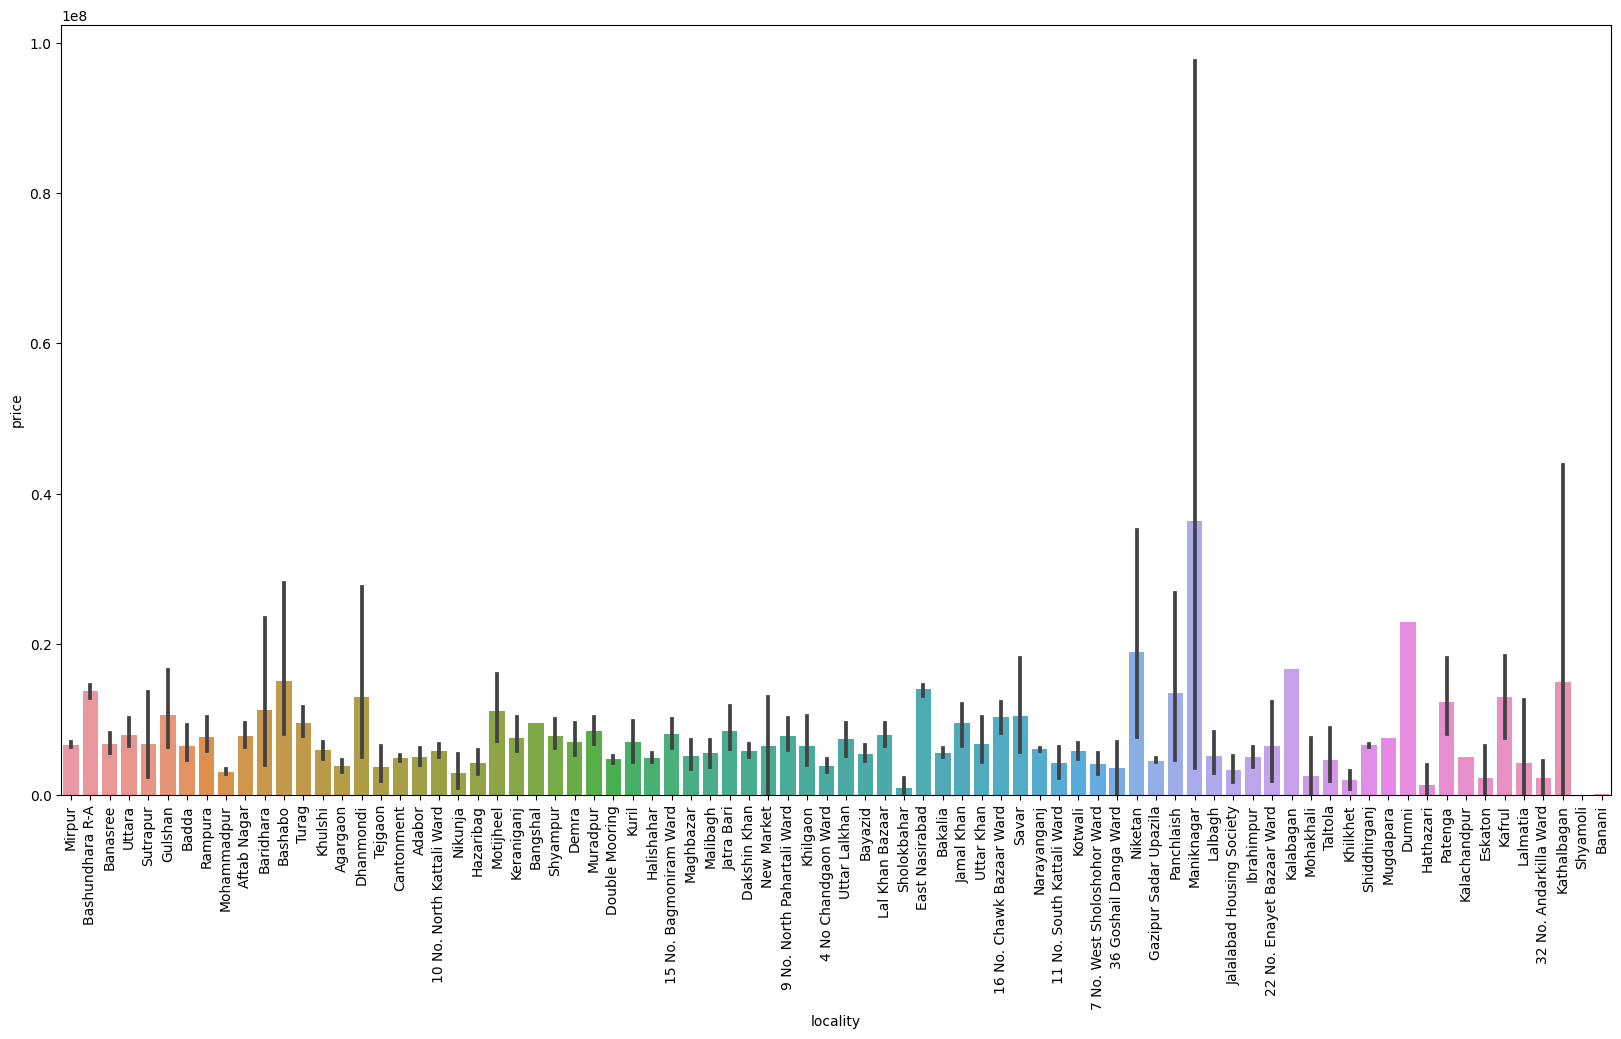

In [13]:
# Price vs locality
plt.figure(figsize=(20, 10))
sns.barplot(x='locality', y='price', data=df)
plt.title("Comparison of real estate prices in different localities")
plt.xlabel("Locality")
plt.ylabel("Real estate prices")
plt.xticks(rotation=90);

In [14]:
# Dealing with outliers
# Price
df['price'].describe()

count    1.258900e+04
mean     7.394465e+06
std      2.004284e+07
min      5.500000e+03
25%      1.500000e+05
50%      5.000000e+06
75%      8.500000e+06
max      1.080000e+09
Name: price, dtype: float64

In [15]:
df['price'].quantile(0.95)

df['price'].quantile(0.05)

df = df[(df['price'] < df['price'].quantile(0.95)) & (df['price'] > df['price'].quantile(0.05))]
df['price'].describe()

count    1.132300e+04
mean     5.446331e+06
std      4.811113e+06
min      1.750000e+04
25%      2.400000e+05
50%      5.000000e+06
75%      8.000000e+06
max      2.080000e+07
Name: price, dtype: float64

<Axes: xlabel='price'>

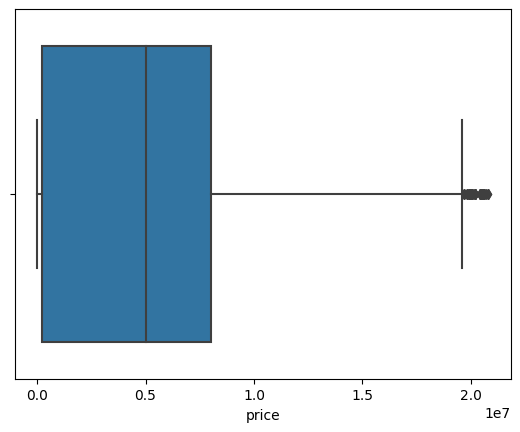

In [16]:
# Check for outliers
# Price
sns.boxplot(x='price', data=df)
plt.title("Target variable outlier distribution");